<a href="https://colab.research.google.com/github/doreennjagi/refugee-population-insights/blob/main/refuges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyreadr



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.2/776.2 kB 15.1 MB/s eta 0:00:00


In [2]:
import pyreadr

# Path to your .rda file
rda_path = '/content/drive/MyDrive/refugees-main/data/refugees.rda'

# Load the R data
result = pyreadr.read_r(rda_path)

# Check what objects are inside
print(result.keys())


PyreadrError: File b'/content/drive/MyDrive/refugees-main/data/refugees.rda' does not exist!

In [3]:
import pyreadr

# Path to your .rda file
rda_path = '/content/drive/MyDrive/refugees-main/data/population.rda'

# Load the R data
result = pyreadr.read_r(rda_path)

# Check what objects are inside
print(result.keys())


odict_keys(['population'])


In [4]:
# Extract main dataframe
df = result['population']

# Preview the first 5 rows
df.head()


,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
0,1951.0,Unknown,UKN,UNK,Australia,AUL,AUS,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,1951.0,Unknown,UKN,UNK,Austria,AUS,AUT,282000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,1951.0,Unknown,UKN,UNK,Belgium,BEL,BEL,55000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,1951.0,Unknown,UKN,UNK,Canada,CAN,CAN,168511.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,1951.0,Unknown,UKN,UNK,Denmark,DEN,DNK,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [5]:
df.to_csv('/content/drive/MyDrive/refugees-main/data/population_clean.csv', index=False)


In [6]:
import pandas as pd

# Load the CSV
df = pd.read_csv('/content/drive/MyDrive/refugees-main/data/population_clean.csv')

# Quick check
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138826 entries, 0 to 138825
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               138826 non-null  float64
 1   coo_name           138826 non-null  object 
 2   coo                138826 non-null  object 
 3   coo_iso            138826 non-null  object 
 4   coa_name           138826 non-null  object 
 5   coa                138826 non-null  object 
 6   coa_iso            138826 non-null  object 
 7   refugees           138826 non-null  float64
 8   asylum_seekers     138826 non-null  float64
 9   returned_refugees  138826 non-null  float64
 10  idps               138826 non-null  float64
 11  returned_idps      138826 non-null  float64
 12  stateless          138826 non-null  float64
 13  ooc                138826 non-null  float64
 14  oip                148 non-null     float64
 15  hst                138826 non-null  float64
dtypes:

In [7]:
# Convert year to int
df['year'] = df['year'].astype(int)

# Drop mostly empty column
df.drop(columns=['oip'], inplace=True)

# Fill any remaining NaNs in numeric columns with 0
numeric_cols = ['refugees','asylum_seekers','returned_refugees','idps','returned_idps','stateless','ooc','hst']
df[numeric_cols] = df[numeric_cols].fillna(0)


In [8]:
# Sum of key KPIs per year
totals = df.groupby('year')[['refugees','asylum_seekers','idps','stateless','hst']].sum()
print(totals)


        refugees  asylum_seekers        idps  stateless         hst
year                                                               
1951   2116011.0             0.0         0.0        0.0         0.0
1952   1952928.0             0.0         0.0        0.0         0.0
1953   1847304.0             0.0         0.0        0.0         0.0
1954   1749628.0             0.0         0.0        0.0         0.0
1955   1717966.0             0.0         0.0        0.0         0.0
...          ...             ...         ...        ...         ...
2021  21327285.0       4616135.0  51322623.0  4338192.0   6731133.0
2022  29429078.0       5442319.0  57321197.0  4428314.0  23957770.0
2023  31637408.0       6858499.0  63251367.0  4358188.0  26095474.0
2024  30958200.0       8352712.0  68131711.0  4360087.0  27279257.0
2025  30490994.0       8414659.0  63852580.0  4431462.0  27102295.0

[75 rows x 5 columns]


In [9]:
growth = totals.pct_change() * 100
print(growth)


       refugees  asylum_seekers       idps  stateless         hst
year                                                             
1951        NaN             NaN        NaN        NaN         NaN
1952  -7.707096             NaN        NaN        NaN         NaN
1953  -5.408494             NaN        NaN        NaN         NaN
1954  -5.287489             NaN        NaN        NaN         NaN
1955  -1.809642             NaN        NaN        NaN         NaN
...         ...             ...        ...        ...         ...
2021   3.220617       10.303862   5.694666   3.801111   54.065018
2022  37.987925       17.897743  11.687972   2.077409  255.924775
2023   7.503905       26.021628  10.345510  -1.583582    8.922800
2024  -2.146851       21.786298   7.715792   0.043573    4.536354
2025  -1.509151        0.741639  -6.280675   1.637009   -0.648705

[75 rows x 5 columns]


In [10]:
top_countries = df[df['year']==2023].sort_values('refugees', ascending=False).head(10)
print(top_countries[['coa_name','refugees']])



                      coa_name   refugees
123223  Iran (Islamic Rep. of)  3752317.0
125987                 Türkiye  3214780.0
124643                Pakistan  1987717.0
125215      Russian Federation  1227554.0
122627                 Germany  1097503.0
120955              Bangladesh   971964.0
124947                  Poland   955891.0
126029                  Uganda   923607.0
121448                    Chad   923323.0
123704                 Lebanon   784884.0


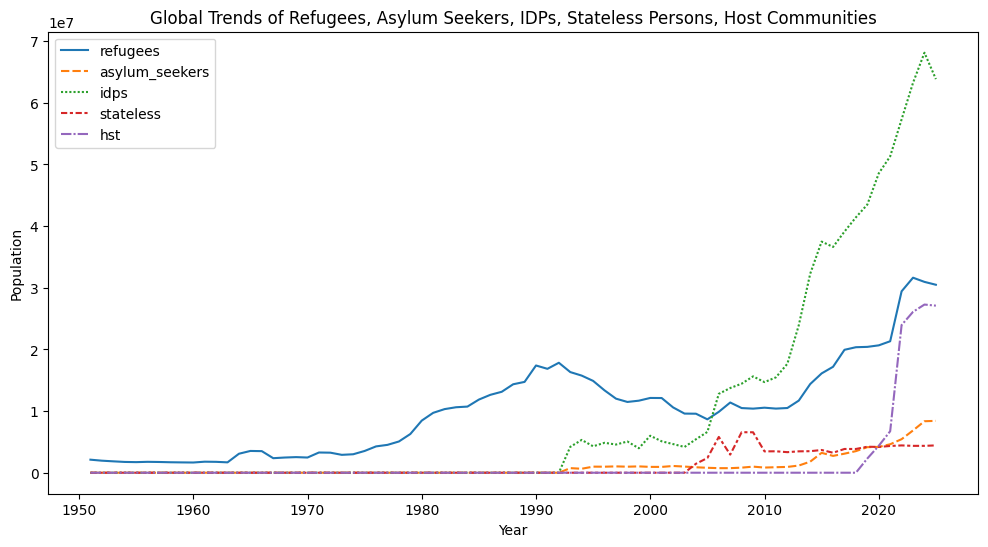

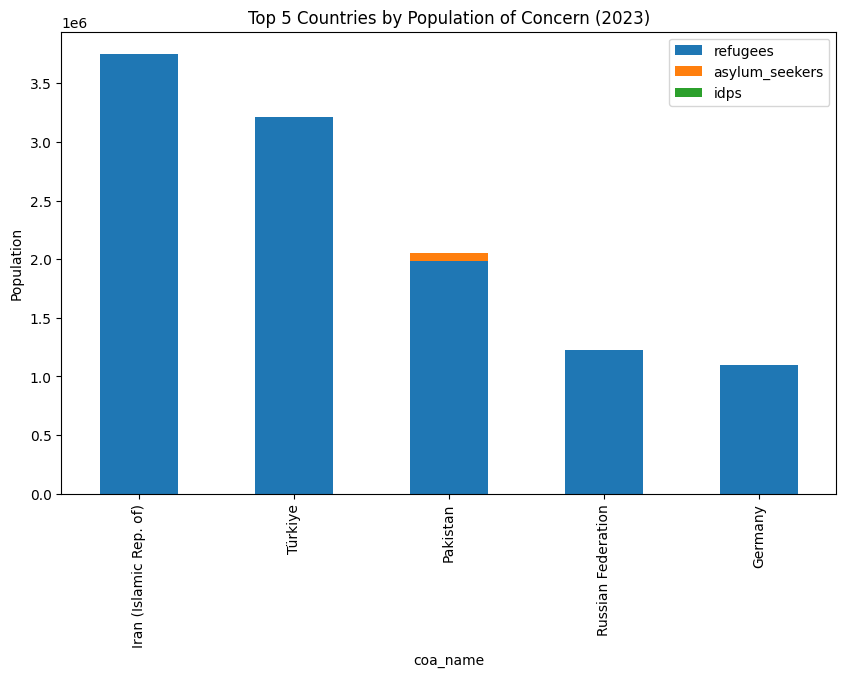

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4a. Trends over time
plt.figure(figsize=(12,6))
sns.lineplot(data=totals)
plt.title('Global Trends of Refugees, Asylum Seekers, IDPs, Stateless Persons, Host Communities')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

# 4b. Top 5 countries by refugees in 2023 (stacked bar)
top5 = df[df['year']==2023].sort_values('refugees', ascending=False).head(5)
top5.set_index('coa_name')[['refugees','asylum_seekers','idps']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Top 5 Countries by Population of Concern (2023)')
plt.ylabel('Population')
plt.show()


In [12]:
# Example: detect sudden jumps in global refugees YoY
totals['refugees_diff'] = totals['refugees'].diff()
totals[totals['refugees_diff'] > totals['refugees_diff'].quantile(0.95)]


,refugees,asylum_seekers,idps,stateless,hst,refugees_diff
year,,,,,,
1990,17395914.0,0.0,0.0,0.0,0.0,2663029.0
2014,14384289.0,1794704.0,32274619.0,3492255.0,0.0,2686056.0
2017,19940566.0,3089507.0,39118516.0,3853982.0,0.0,2756280.0
2022,29429078.0,5442319.0,57321197.0,4428314.0,23957770.0,8101793.0
